In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [68]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data'

In [69]:
files = glob.glob(f"{data_folder}\\*.csv")
files


['C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\3285895.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\precipitation_troylockdam.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\Q_ids_with_begin-end-date.csv',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\USW00014743 (1).csv']

In [34]:
data = pd.read_csv(files[0],  delimiter=',', index_col='DATE', usecols=['DATE', 'PRCP', 'EVAP', 'STATION', 'LATITUDE', 'LONGITUDE'], parse_dates=True)
#precip.loc['1939'::].plot(figsize=(12,8))
data

,STATION,LATITUDE,LONGITUDE,EVAP,PRCP
DATE,,,,,
1869-01-01,USW00094728,40.77898,-73.96925,NaN,19.1
1869-01-02,USW00094728,40.77898,-73.96925,NaN,0.8
1869-01-03,USW00094728,40.77898,-73.96925,NaN,0.0
1869-01-04,USW00094728,40.77898,-73.96925,NaN,4.6
1869-01-05,USW00094728,40.77898,-73.96925,NaN,1.3
...,...,...,...,...,...
1951-06-26,USC00305806,40.85000,-73.91667,NaN,0.0
1951-06-27,USC00305806,40.85000,-73.91667,NaN,8.9
1951-06-28,USC00305806,40.85000,-73.91667,NaN,0.3


In [50]:
#create unique list of names
unique_station = data.STATION.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {x : pd.DataFrame() for x in unique_station}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data.STATION == key]


In [52]:
DataFrameDict[unique_station[0]]

,STATION,LATITUDE,LONGITUDE,EVAP,PRCP
DATE,,,,,
1869-01-01,USW00094728,40.77898,-73.96925,NaN,19.1
1869-01-02,USW00094728,40.77898,-73.96925,NaN,0.8
1869-01-03,USW00094728,40.77898,-73.96925,NaN,0.0
1869-01-04,USW00094728,40.77898,-73.96925,NaN,4.6
1869-01-05,USW00094728,40.77898,-73.96925,NaN,1.3
...,...,...,...,...,...
2023-03-21,USW00094728,40.77898,-73.96925,NaN,0.0
2023-03-22,USW00094728,40.77898,-73.96925,NaN,0.0
2023-03-23,USW00094728,40.77898,-73.96925,NaN,2.3


In [72]:
unique_lat = data.LATITUDE.unique()
unique_lon = data.LONGITUDE.unique()

locations = pd.DataFrame([unique_lat, unique_lon]).T

locations = locations.rename({0:'lat', 1:'lon'}, axis='columns')
locations.to_csv(f'{data_folder}\\P\\locations_P.csv')

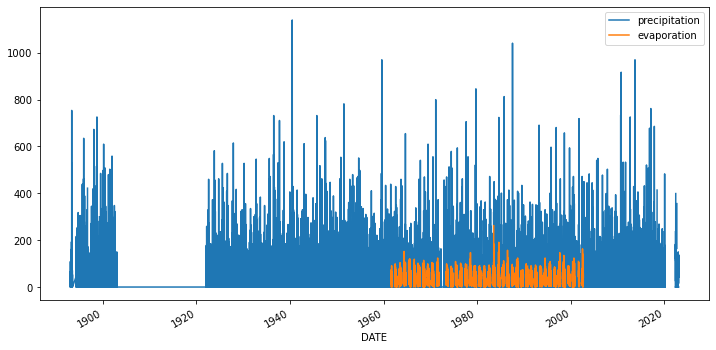

In [9]:
data = pd.read_csv(files[2], delimiter=',', index_col='DATE', usecols=['DATE', 'PRCP', 'EVAP'], parse_dates=True)
fig, ax = plt.subplots(figsize=(12,6))
data.PRCP.plot(ax=ax, label='precipitation')
data.EVAP.plot(ax=ax, label='evaporation')
ax.legend()

In [54]:
data1 = pd.read_csv(files[2], delimiter=',', index_col='DATE', usecols=['DATE', 'PRCP'], parse_dates=True)
data2 = pd.read_csv(files[2], delimiter=',', index_col='DATE', usecols=['DATE', 'EVAP'], parse_dates=True)

<AxesSubplot:xlabel='DATE'>

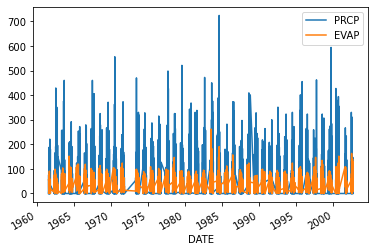

In [53]:
pd.concat([data1, data2], axis=1, join='inner').plot()

In [50]:
data2

,EVAP
DATE,
1893-01-01,NaN
1893-01-02,NaN
1893-01-03,NaN
1893-01-04,NaN
1893-01-05,NaN
...,...
2023-01-19,NaN
2023-01-23,NaN
2023-01-25,NaN
